In [ ]:
import pandas as pd
import seaborn as sns
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Data_Pal.xlsx')
df.shape

(25100, 17)

In [ ]:
df.head()

,Ecole,Ecole.1,Date,Code_District,Code_Centre,Code_Option,Num_Ecole_Centre,Code_gestion_Etabli,Participants,Participans_Fille_total,Participants_Garcon,Total_Reussite,Reussite_Fille,Reussite_Garcon,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,COLLEGE LES DISCIPLES,2735,2019-07-16,11,1,101,1,7,5,2,3,2,1,1,NaN,NaN,NaN
1,COLLEGE SAINT ANDRE,1707,2019-07-16,11,1,101,2,7,25,15,10,21,12,9,NaN,NaN,NaN
2,COLLEGE SAINT RAPHAEL,944,2019-07-16,11,1,101,3,2,49,26,23,49,26,23,NaN,NaN,NaN
3,C.S. CARDINAL MOSENGWO,1654,2019-07-16,11,1,101,4,7,54,29,25,54,29,25,NaN,NaN,NaN
4,COMPLEXE SCOLAIRE ELIMU 1,2668,2019-07-16,11,1,101,5,7,13,8,5,9,4,5,NaN,NaN,NaN


In [ ]:
#df = pd.read_csv('bike_sharing_daily.csv')
df_select = df[['Date','Participants']]
df_select.columns = ['ds','y']
df_select.tail()

,ds,y
25095,2021-09-29,12
25096,2021-09-29,37
25097,2021-09-29,16
25098,2021-09-29,4
25099,2021-09-29,2


In [ ]:

# Fitting with default parameters
bike_model_0 = Prophet()
bike_model_0.fit(df_select)

# Generate 20 data points for the future period
future= bike_model_0.make_future_dataframe(periods=20, freq='d')
future.tail()

# Apply the model to forecast the 20 future data points
bike_model_0_data=bike_model_0.predict(future)
bike_model_0_data.tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw1g8p3dt/05cwytuy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw1g8p3dt/vi_33y24.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36524', 'data', 'file=/tmp/tmpw1g8p3dt/05cwytuy.json', 'init=/tmp/tmpw1g8p3dt/vi_33y24.json', 'output', 'file=/tmp/tmptwclzb5x/prophet_model-20220922145014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:50:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
18,2021-10-15,18.471329,-14.747836,38.965795,18.459898,18.482316,-6.724718,-6.724718,-6.724718,-6.724718,-6.724718,-6.724718,0.0,0.0,0.0,11.746611
19,2021-10-16,18.471802,-15.025882,39.175949,18.458579,18.485185,-6.175280,-6.175280,-6.175280,-6.175280,-6.175280,-6.175280,0.0,0.0,0.0,12.296521
20,2021-10-17,18.472274,-13.689015,40.726641,18.457394,18.487158,-5.547490,-5.547490,-5.547490,-5.547490,-5.547490,-5.547490,0.0,0.0,0.0,12.924784
21,2021-10-18,18.472746,-13.456064,40.123424,18.455170,18.489342,-4.856143,-4.856143,-4.856143,-4.856143,-4.856143,-4.856143,0.0,0.0,0.0,13.616603
22,2021-10-19,18.473218,-11.276990,42.460690,18.453609,18.491438,-4.117306,-4.117306,-4.117306,-4.117306,-4.117306,-4.117306,0.0,0.0,0.0,14.355913


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw1g8p3dt/7ha650t7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw1g8p3dt/tp_x6fkd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4710', 'data', 'file=/tmp/tmpw1g8p3dt/7ha650t7.json', 'init=/tmp/tmpw1g8p3dt/tp_x6fkd.json', 'output', 'file=/tmp/tmpx0y_2ls3/prophet_model-20220922145017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:50:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


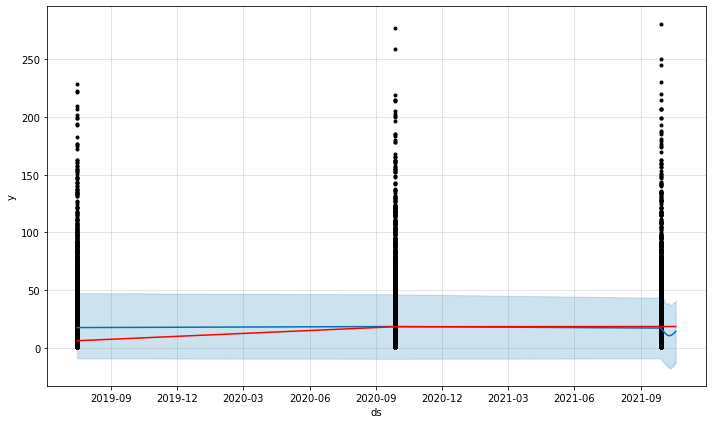

In [ ]:
bike_model_0 = Prophet()
forecast = bike_model_0.fit(df_select).predict(future)
fig= bike_model_0.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), bike_model_0, forecast)

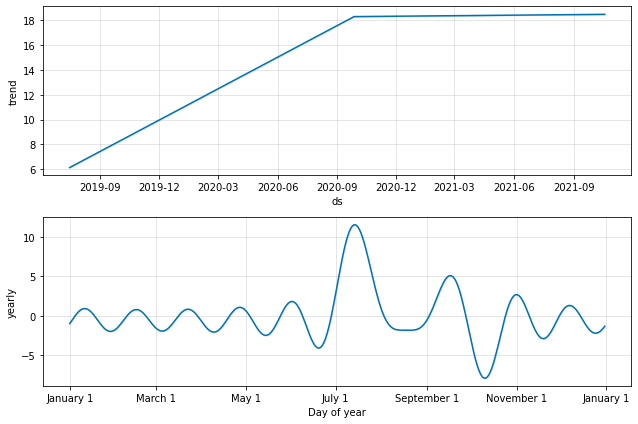

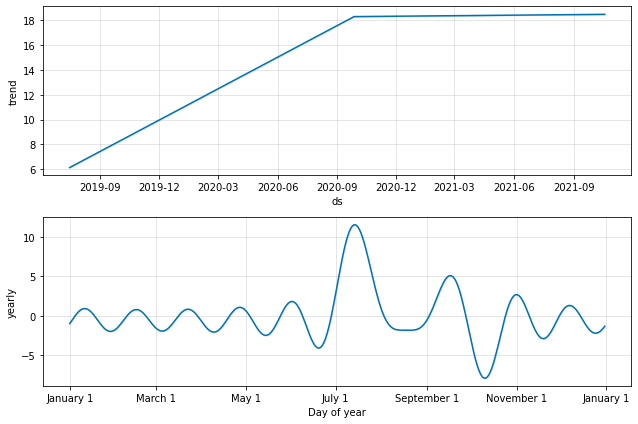

In [ ]:
bike_model_0.plot_components(forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw1g8p3dt/yd4ym86b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw1g8p3dt/fkufd6g6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40546', 'data', 'file=/tmp/tmpw1g8p3dt/yd4ym86b.json', 'init=/tmp/tmpw1g8p3dt/fkufd6g6.json', 'output', 'file=/tmp/tmp6ki91ea1/prophet_model-20220922145022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:50:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


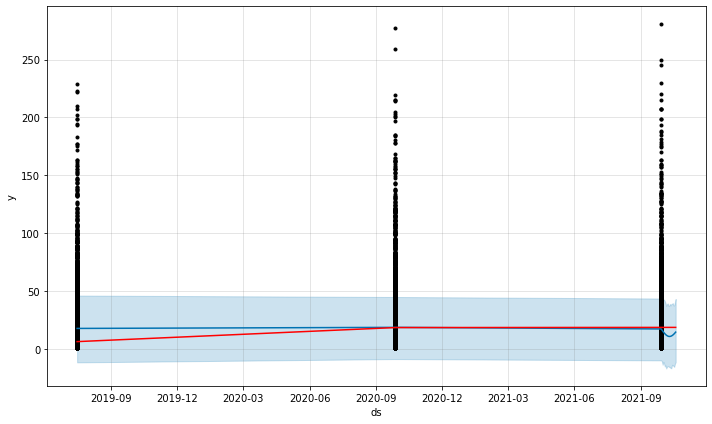

In [ ]:
bike_model_2 = Prophet( # n_changepoints=20, # this is optional 
                  yearly_seasonality=True, 
                  changepoint_prior_scale=0.1
                   )
forecast = bike_model_2.fit(df_select).predict(future)
fig= bike_model_2.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), bike_model_2, forecast)

In [ ]:
pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Diagnostics 0
from fbprophet.diagnostics import cross_validation
bike_0_cv = cross_validation(bike_model_0, 
                         initial='365 days', 
                         period='480 days', 
                         horizon = '365 days')
bike_0_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-09-29 00:00:00 and 2020-09-29 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpw1g8p3dt/c4x4ia8o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw1g8p3dt/ipiqamyh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43221', 'data', 'file=/tmp/tmpw1g8p3dt/c4x4ia8o.json', 'init=/tmp/tmpw1g8p3dt/ipiqamyh.json', 'output', 'file=/tmp/tmpqbv1jj5l/prophet_model-20220922145035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:50:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-09-29,19.307299,-8.611124,47.819013,52,2020-09-29
1,2021-09-29,19.307299,-7.628995,44.512078,5,2020-09-29
2,2021-09-29,19.307299,-7.114339,46.261018,10,2020-09-29
3,2021-09-29,19.307299,-8.748318,46.355052,33,2020-09-29
4,2021-09-29,19.307299,-8.860739,44.621446,10,2020-09-29


In [ ]:
# Performance 0
from fbprophet.diagnostics import performance_metrics
bike_0_p = performance_metrics(bike_0_cv)
bike_0_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,365 days,448.701707,21.18258,14.191326,2.18386,0.93073,0.92943
